<a href="https://colab.research.google.com/github/ai7dnn/2021-2-DNN/blob/main/code/21_8_reg_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.__version__

'2.6.0'

# 케라스로 구현하는 선형 회귀 y = 2x

In [2]:
import tensorflow as tf

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = tf.keras.models.Sequential([
    #                   출력, 입력=(*, 1)           그대로 출력
    tf.keras.layers.Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

In [19]:
# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력 정보를 지정
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse', metrics=['mae', 'mse'])
#model.compile(optimizer='SGD', loss='mse', metrics=['mae'])

In [20]:
# 모델을 표시(시각화)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [21]:
# ④ 생성된 모델로 훈련 데이터 학습
# 훈련과정 정보를 history 객체에 저장 
history = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 332ms/step - loss: 0.9994 - mae: 0.9997 - mse: 0.9994
Epoch 2/500
1/1 [==============================] - 0s 14ms/step - loss: 0.7338 - mae: 0.8548 - mse: 0.7338
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5492 - mae: 0.7340 - mse: 0.5492
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4209 - mae: 0.6333 - mse: 0.4209
Epoch 5/500
1/1 [==============================] - 0s 7ms/step - loss: 0.3317 - mae: 0.5493 - mse: 0.3317
Epoch 6/500
1/1 [==============================] - 0s 7ms/step - loss: 0.2695 - mae: 0.4793 - mse: 0.2695
Epoch 7/500
1/1 [==============================] - 0s 13ms/step - loss: 0.2261 - mae: 0.4210 - mse: 0.2261
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1958 - mae: 0.3723 - mse: 0.1958
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.1745 - mae: 0.3362 - mse: 0.1745
Epoch 10/500
1/1 [========================

In [22]:
# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('손실:', model.evaluate(x_test, y_test))

1/1 [==============================] - 0s 130ms/step - loss: 0.0071 - mae: 0.0749 - mse: 0.0071
손실: [0.007053956389427185, 0.07492011785507202, 0.007053956389427185]


In [23]:
type(history)

keras.callbacks.History

In [24]:
history.history['loss']

[0.9993945956230164,
 0.7337678670883179,
 0.5492140650749207,
 0.4209165871143341,
 0.3316553235054016,
 0.2694825232028961,
 0.22610636055469513,
 0.19577491283416748,
 0.17449593544006348,
 0.15950003266334534,
 0.14886470139026642,
 0.14125695824623108,
 0.13575097918510437,
 0.1317048817873001,
 0.12867328524589539,
 0.12634672224521637,
 0.12451067566871643,
 0.12301644682884216,
 0.12176080793142319,
 0.1206718236207962,
 0.1196998581290245,
 0.11881034821271896,
 0.11797940731048584,
 0.11719029396772385,
 0.11643161624670029,
 0.11569521576166153,
 0.11497557163238525,
 0.1142687276005745,
 0.11357204616069794,
 0.11288375407457352,
 0.11220225691795349,
 0.11152692139148712,
 0.1108570545911789,
 0.11019209772348404,
 0.10953173041343689,
 0.10887585580348969,
 0.10822418332099915,
 0.10757657140493393,
 0.10693305730819702,
 0.10629347711801529,
 0.10565774142742157,
 0.105026014149189,
 0.1043979749083519,
 0.10377372801303864,
 0.1031532734632492,
 0.10253646224737167,
 0.

In [9]:
# x = [3.5, 5, 5.5, 6]의 예측 
print(model.predict([3.5, 5, 5.5, 6]))

pred = model.predict([3.5, 5, 5.5, 6])
# 예측 값만 1차원으로 
print(pred.flatten())
print(pred.squeeze())

[[ 6.838603]
 [ 9.408915]
 [10.265685]
 [11.122457]]
[ 6.838603  9.408915 10.265685 11.122457]
[ 6.838603  9.408915 10.265685 11.122457]


패러미터(가중치와 편향) 확인 및 직접 계산

In [10]:
model.weights[0].numpy()

array([[1.7135413]], dtype=float32)

## 손실과 예측 시각화

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mae', 'mse'])

Text(0, 0.5, 'loss')

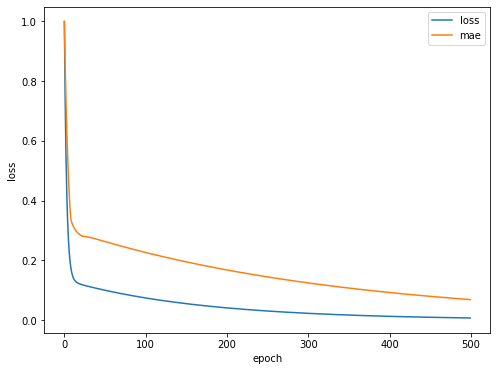

In [26]:
import matplotlib.pylab as plt

# 그래프 그리기
fig = plt.figure(figsize=(8, 6)) 

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['mae'], label='mae')
#plt.plot(history.history['mse'], label='mse')

plt.legend(loc='best')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'y')

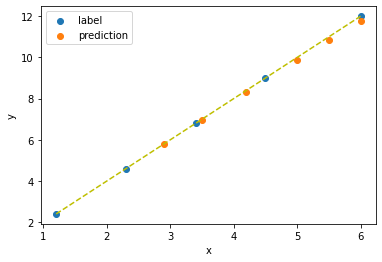

In [27]:
import matplotlib.pylab as plt

x_test = [1.2, 2.3, 3.4, 4.5, 6.0]
y_test = [2.4, 4.6, 6.8, 9.0, 12.0]

# 그래프 그리기
fig = plt.figure(figsize=(6, 4)) 

plt.scatter(x_test, y_test, label='label')
plt.plot(x_test, y_test, 'y--')

x = [2.9, 3.5, 4.2, 5, 5.5, 6]
pred = model.predict(x)
plt.scatter(x, pred.flatten(), label='prediction')

plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('y')

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
model = Sequential([
    Dense(1, input_shape=(1, ), activation='linear')
    #Dense(1, input_dim=1)
])

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 훈련에 사용할 옵티마이저(optimizer)와 손실 함수, 출력정보를 선택
# Mean Absolute Error, Mean Squared Error
model.compile(optimizer='SGD', loss='mse', metrics=['mae', 'mse'])

# 모델을 표시(시각화)
model.summary()

# ④ 생성된 모델로 훈련 데이터 학습
model.fit(x_train, y_train, epochs=1000)

# ⑤ 테스트 데이터로 성능 평가
x_test = [1.2, 2.3, 3.4, 4.5]
y_test = [2.4, 4.6, 6.8, 9.0]

print('정확도:', model.evaluate(x_test, y_test))

print(model.predict([3.5, 5, 5.5, 6]))


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1/1 [==============================] - 0s 388ms/step - loss: 19.2212 - mae: 4.0022 - mse: 19.2212
Epoch 2/1000
1/1 [==============================] - 0s 7ms/step - loss: 13.3491 - mae: 3.3218 - mse: 13.3491
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 9.2745 - mae: 2.7551 - mse: 9.2745
Epoch 4/1000
1/1 [==============================] - 0s 7ms/step - loss: 6.4472 - mae: 2.2831 - mse: 6.4472
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 4.4853 - mae: 1.8899 - mse: 4.4853
Epoch 6/1000
1/1 [==============================] - 0s 6ms/step - loss: 3.1239 - mae: 1.5625 - mse: 3.1239
Epoch 

# y = 2x + 1 예측

In [16]:
import tensorflow as tf
import numpy as np

#훈련과 테스트 데이터
x = np.array([0, 1, 2, 3, 4])
y = np.array([1, 3, 5, 7, 9]) #y = x * 2 + 1

#인공신경망 모델 사용
model = tf.keras.models.Sequential()

#은닉계층 하나 추가 
model.add(tf.keras.layers.Dense(1, input_shape=(1,)))

#모델의 패라미터를 지정하고 모델 구조를 생성
#최적화 알고리즘: 확률적 경사 하강법(SGD: Stochastic Gradient Descent)
#손실 함수(loss function): 평균제곱오차(MSE: Mean Square Error)  
model.compile('SGD', 'mse')

#생성된 모델로 훈련 자료로 입력(x[:2])과 출력(y[:2])을 사용하여 학습
#키워드 매개변수 epoch(에퐄): 훈련반복횟수
#키워드 매개변수 verbose: 학습진행사항 표시
model.fit(x[:3], y[:3], epochs=1000, verbose=0)

#테스트 자료의 결과를 출력
print('Targets(정답):', y[2:])

#학습된 모델로 테스트 자료로 결과를 예측(model.predict)하여 출력
print('Predictions(예측):', model.predict(x[2:]).flatten())

Targets(정답): [5 7 9]
Predictions(예측): [4.999833  6.999561  8.9992895]


# 텐서플로로만 구현하는 선형 회귀 예제

In [17]:
import tensorflow as tf
# ① 문제와 정답 데이터 지정
x_train = [1, 2, 3, 4]
y_train = [2, 4, 6, 8]

# ② 모델 구성(생성)
# 선형회귀 모델(Wx + b)을 위한 tf.Variable을 선언합니다.
W = tf.Variable(tf.random.normal(shape=[1]))
b = tf.Variable(tf.random.normal(shape=[1]))

@tf.function
def linear_model(x):
    return W*x + b

# ③ 학습에 필요한 최적화 방법과 손실 함수 등 지정
# 최적화를 위한 그라디언트 디센트 옵티마이저를 정의합니다.
optimizer = tf.optimizers.SGD(0.01)

# 손실 함수를 정의합니다. MSE 손실함수 \mean{(y' - y)^2}
@tf.function
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

# ④ 생성된 모델로 훈련 데이터 학습
# 최적화를 위한 function을 정의합니다.
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        y_pred = linear_model(x) # 모델에 위한 예측 값 계산
        loss = mse_loss(y_pred, y) # MSE 손실 계산
    gradients = tape.gradient(loss, [W, b]) # 미분 자동계산
    optimizer.apply_gradients(zip(gradients, [W, b])) # 최적화 과정에 적용

# 경사하강법을 1000번 수행합니다.
for i in range(1000):
    train_step(x_train, y_train)

# ⑤ 테스트 데이터로 성능 평가
#x_test = [3.5, 5, 5.5, 6]
x_test = [10, 11, 12, 13]

# 테스트 데이터를 이용해 학습된 선형회귀 모델이 데이터의 경향성(y=2x)을 잘 학습했는지 측정합니다.
# 예상되는 참값 : [7, 10, 11, 12]
print(linear_model(x_test).numpy())

[19.882591 21.86596  23.849329 25.832699]


* exercise

In [18]:
import tensorflow as tf

x = tf.ones((2, 2))

with tf.GradientTape() as t:
    t.watch(x)
    y = tf.reduce_sum(x)
    z = tf.multiply(y, y)

# 입력 텐서 x에 대한 z의 도함수
dz_dx = t.gradient(z, x)
for i in [0, 1]:
    for j in [0, 1]:
        assert dz_dx[i][j].numpy() == 8.0